### LSTM single variable

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
np.random.seed(7)

In [7]:
df = pd.read_csv('international-airline-passengers.csv', usecols=[1], sep=';')
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


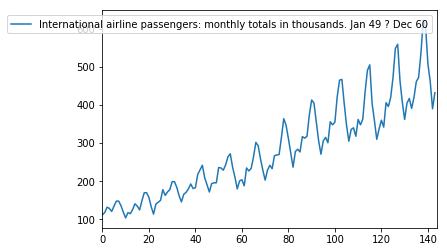

In [34]:
df.plot()

In [8]:
dataset = df.values.astype('float32')
dataset.shape

(145, 1)

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

97 48


In [20]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - look_back -1):
        data_X.append(dataset[i:(i+look_back), 0])
        data_Y.append(dataset[(i+look_back), 0])
    return np.array(data_X), np.array(data_Y)

In [36]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape

(93, 3)

In [37]:
# reshape input to be [samples, time_steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(93, 1, 3)

In [38]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0343
Epoch 2/100
 - 0s - loss: 0.0145
Epoch 3/100
 - 0s - loss: 0.0115
Epoch 4/100
 - 0s - loss: 0.0100
Epoch 5/100
 - 1s - loss: 0.0088
Epoch 6/100
 - 0s - loss: 0.0075
Epoch 7/100
 - 0s - loss: 0.0066
Epoch 8/100
 - 0s - loss: 0.0057
Epoch 9/100
 - 0s - loss: 0.0052
Epoch 10/100
 - 0s - loss: 0.0045
Epoch 11/100
 - 0s - loss: 0.0044
Epoch 12/100
 - 0s - loss: 0.0039
Epoch 13/100
 - 0s - loss: 0.0038
Epoch 14/100
 - 0s - loss: 0.0038
Epoch 15/100
 - 0s - loss: 0.0036
Epoch 16/100
 - 0s - loss: 0.0035
Epoch 17/100
 - 0s - loss: 0.0035
Epoch 18/100
 - 1s - loss: 0.0035
Epoch 19/100
 - 0s - loss: 0.0034
Epoch 20/100
 - 0s - loss: 0.0034
Epoch 21/100
 - 0s - loss: 0.0034
Epoch 22/100
 - 0s - loss: 0.0034
Epoch 23/100
 - 0s - loss: 0.0033
Epoch 24/100
 - 0s - loss: 0.0033
Epoch 25/100
 - 0s - loss: 0.0033
Epoch 26/100
 - 0s - loss: 0.0032
Epoch 27/100
 - 0s - loss: 0.0032
Epoch 28/100
 - 0s - loss: 0.0032
Epoch 29/100
 - 0s - loss: 0.0031
Epoch 30/100
 - 0s - lo

In [39]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.08 RMSE
Test Score: 56.51 RMSE


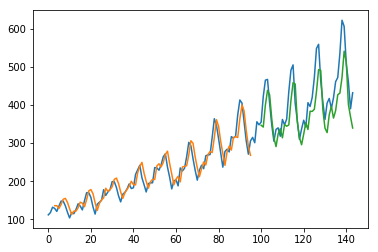

In [40]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### LSTM for Regression Using the Window Method